In [1]:
from IPython.core.display import display, HTML
display(HTML(
    '<style>'
        '#notebook { padding-top:0px !important; } ' 
        '.container { width:100% !important; } '
        '.end_space { min-height:0px !important; } '
    '</style>'
))

In [4]:
import pandas as pd
import numpy as np
from io import StringIO

POS_DWELL = 0
POS_MEAN = 1
POS_MEDIAN = 2
POS_STD = 3
POS_BOXPLOT = 4
POS_DWELL_STD = 5

def get_boxplot_stats(data):
    return [round(np.min(data), 4), round(np.percentile(data, 25), 4), round(np.median(data), 4), round(np.percentile(data, 75), 4), round(np.max(data), 4)]

def get_stats(file_path, base_shift=0):
    df = pd.read_csv(file_path, sep='\t', header=None)

    # Initialize an empty list to store cell means
    pos_dwell = []
    pos_mean = []
    pos_median = []
    pos_std = []
    pos_boxplot = []
    pos_dwell_std = []
    
    # Iterate over columns
    for col in df.columns[abs(base_shift):]:
        col_means = []
        col_dwells = []
        col_medians = []
        col_stds = []
        col_values = []

        for cell in df[col]:
            if pd.isna(cell):
                continue

            cell_values = str(cell).split(',')
            col_dwells.append(len(cell_values))

            numeric_values = pd.to_numeric(cell_values, errors='coerce')
            col_values.extend(numeric_values)
            col_means.append(np.nanmean(numeric_values))
            col_medians.append(np.nanmedian(numeric_values))
            col_stds.append(np.std(numeric_values))
        
#         print(col_dwells)
#         print(col_values)
        
        pos_dwell.append(get_boxplot_stats(col_dwells))
        pos_mean.append(get_boxplot_stats(col_means))
        pos_median.append(get_boxplot_stats(col_medians))
        pos_std.append(get_boxplot_stats(col_stds))
        pos_boxplot.append(get_boxplot_stats(col_values))
        
        pos_dwell_std.append(np.std(col_dwells))
        

#     print(pos_dwell)
#     print(pos_mean)
#     print(pos_median)
#     print(pos_std)
    return [pos_dwell, pos_mean, pos_median, pos_std, pos_boxplot, pos_dwell_std]



In [2]:
# %matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D

colors = ['lightblue','lightcoral','lightcyan','lightgoldenrodyellow','lightgreen','lightpink','lightsalmon','lightseagreen','lightskyblue','lightslategray']
medianprops = dict(color='red', linewidth=2)

def draw_boxplots(stats, ref, ref_index, title, labels):

    plt.figure(figsize=(30,6))

    num_stats = len(stats)
    
    all_stats = []
    x_ticks = []
    for i in range(len(stats[0])):
        for j in range(num_stats):
            all_stats.append(stats[j][i])

    for i in range(len(stats[0])):
        x_ticks.append(ref[i])
        x_ticks.append(ref_index[i])
        for j in range(num_stats-2):
            x_ticks.append('')

    distance_within_group = 1
    distance_between_groups = 3
    positions = [0]
    positions.append(positions[-1]+distance_within_group)
    for i in range(len(stats[0])):
        for j in range(num_stats-1):
            positions.append(positions[-1]+distance_within_group)
        positions.append(positions[-1]+distance_between_groups)

    positions = positions[1:-1]

    # Set box colors
    box_colors = colors[:num_stats] * (len(all_stats) // 2)

    # Create paired box plots with different colors for experiments and controls
    bplot = plt.boxplot(all_stats, medianprops=medianprops, positions=positions, vert=True, patch_artist=True, flierprops=dict(marker='.', markerfacecolor='black', markersize=5))

    for patch, color in zip(bplot['boxes'], box_colors):
        patch.set_facecolor(color)
        
    legend_elements = []
    for j in range(num_stats):
        legend_elements.append(Line2D([0], [0], marker='s', color='w', markerfacecolor=box_colors[j], markersize=10, label=labels[j]))
    
    plt.legend(handles=legend_elements, loc='upper right')

    # Add labels and title
    plt.xticks(positions, x_ticks)
    plt.title(title)

    # Show the plot
    plt.show()

In [5]:
ref = "AGGTTGCAGTGAACCAACGTCGCCACTGCACTCCAGTCTGGCGACAGAGCGAGACTCCCTGTCA"
ref_index = list(range(7,100))

file_path = '/media/hiruna/data/basecalling_work/squigualiser/test/data/raw/metric/eventalign.tsv'
f5c = get_stats(file_path, base_shift=-6)

file_path = '/media/hiruna/data/basecalling_work/squigualiser/test/data/raw/metric/nanopolish.tsv'
nanopolish = get_stats(file_path, base_shift=-6)

file_path = '/media/hiruna/data/basecalling_work/squigualiser/test/data/raw/metric/realign.tsv'
realign = get_stats(file_path, base_shift=-6)

file_path = '/media/hiruna/data/basecalling_work/squigualiser/test/data/raw/metric/sigfish.tsv'
sigfish = get_stats(file_path, base_shift=-6)

file_path = '/media/hiruna/data/basecalling_work/squigualiser/test/data/raw/metric/squigualator.tsv'
squigulator = get_stats(file_path, base_shift=-6)

file_path = '/media/hiruna/data/basecalling_work/squigualiser/test/data/raw/metric/uncalled4.tsv'
uncalled4 = get_stats(file_path, base_shift=-6)

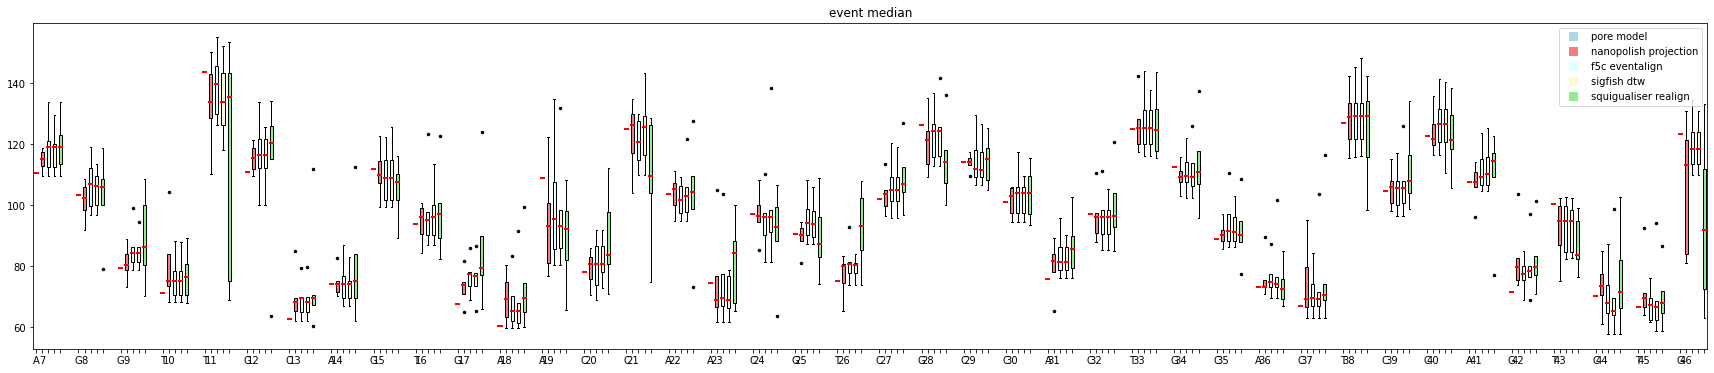

In [5]:
start_base = 0
end_base = 40
stats_index = POS_MEDIAN
stats = [squigulator[stats_index][start_base:end_base], nanopolish[stats_index][start_base:end_base], f5c[stats_index][start_base:end_base], sigfish[stats_index][start_base:end_base], realign[stats_index][start_base:end_base]]
legend_labels = ['pore model', 'nanopolish projection', 'f5c eventalign', 'sigfish dtw', 'squigualiser realign']
draw_boxplots(stats, ref, ref_index, "event median", legend_labels)

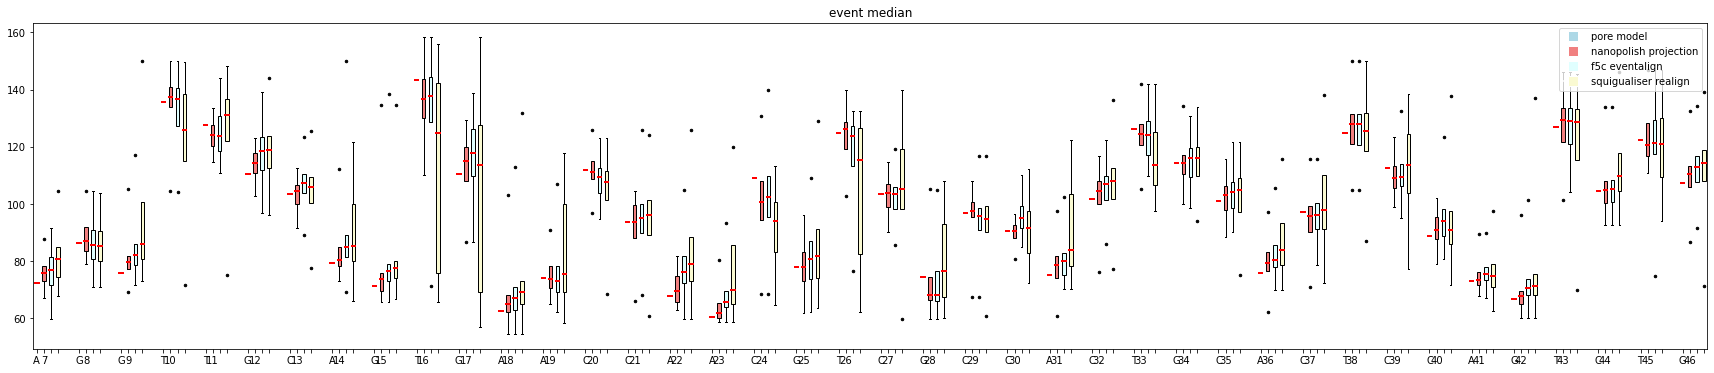

In [6]:
start_base = 0
end_base = 40
stats_index = POS_BOXPLOT
stats = [squigulator[stats_index][start_base:end_base], nanopolish[stats_index][start_base:end_base], f5c[stats_index][start_base:end_base], realign[stats_index][start_base:end_base]]
legend_labels = ['pore model', 'nanopolish projection', 'f5c eventalign', 'squigualiser realign']
draw_boxplots(stats, ref, ref_index, "event median", legend_labels)

In [7]:
import matplotlib.pyplot as plt

x_min = 0
x_max = 20
y_min = 0
y_max = 20

MIN_INDEX = 0
Q1_INDEX = 1
MEDIAN_INDEX = 2
Q3_INDEX = 3
MAX_INDEX = 4

def fix_range(arr):
    lower_limit = x_min
    upper_limit = x_max
    mask = (arr < lower_limit) | (arr > upper_limit)
    arr[mask] = np.nan
    return arr

def draw_scatter(list_a, list_b, label_a, label_b):
    
    use_stat_index = MEDIAN_INDEX
    
    a_x = np.array([sublist[use_stat_index] for sublist in list_a[POS_DWELL]])
    a_y = np.array([sublist[use_stat_index] for sublist in list_a[POS_STD]])
    b_x = np.array([sublist[use_stat_index] for sublist in list_b[POS_DWELL]])
    b_y = np.array([sublist[use_stat_index] for sublist in list_b[POS_STD]])
    
    a_x = fix_range(a_x)
    b_x = fix_range(b_x)
    
    plt.scatter(a_x, a_y, color='blue', marker='o', label=label_a)
    plt.scatter(b_x, b_y, color='red', marker='o', label=label_b)

    # Add labels and title
    plt.xlabel('dwell time')
    plt.ylabel('current level stddev')
    plt.title('dwell time Vs current level stddev')
    plt.legend()
    
    # Set x-axis limits
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    
    fig_name = "dwell_vs_current_{}.svg".format(label_b) 
    plt.savefig(fig_name, format='svg')

    # Show the plot
    plt.show()
    
def draw_scatter_2(list_a, list_b, label_a, label_b):
    
    use_stat_index = MEDIAN_INDEX
    
    a_x = np.array(list_a[POS_DWELL_STD])
    a_y = np.array([sublist[use_stat_index] for sublist in list_a[POS_STD]])
    b_x = np.array(list_b[POS_DWELL_STD])
    b_y = np.array([sublist[use_stat_index] for sublist in list_b[POS_STD]])
    
    a_x = fix_range(a_x)
    b_x = fix_range(b_x)
    
    plt.scatter(a_x, a_y, color='blue', marker='o', label=label_a)
    plt.scatter(b_x, b_y, color='red', marker='o', label=label_b)

    # Add labels and title
    plt.xlabel('dwell time stddev')
    plt.ylabel('current level stddev')
    plt.title('dwell time stddev Vs current level stddev')
    plt.legend()
    
    # Set x-axis limits
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    
    fig_name = "dwell_stddev_vs_current_stddev_{}.svg".format(label_b) 
    plt.savefig(fig_name, format='svg')

    # Show the plot
    plt.show()

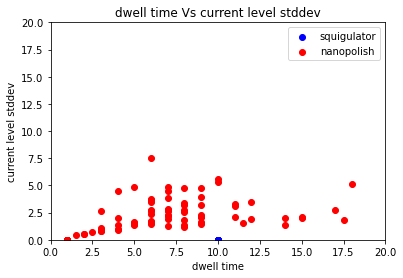

In [28]:
draw_scatter(squigulator, nanopolish, 'squigulator', 'nanopolish')

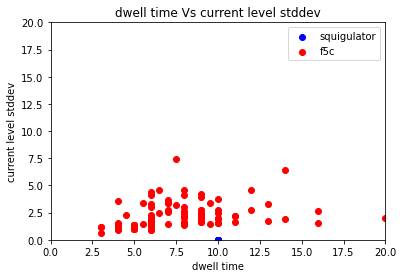

In [29]:
draw_scatter(squigulator, f5c, 'squigulator', 'f5c')

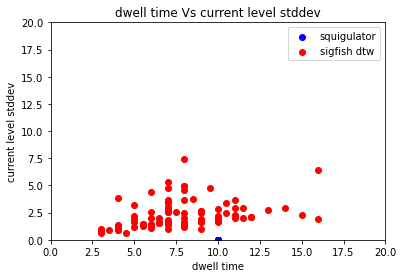

In [30]:
draw_scatter(squigulator, sigfish, 'squigulator', 'sigfish dtw')

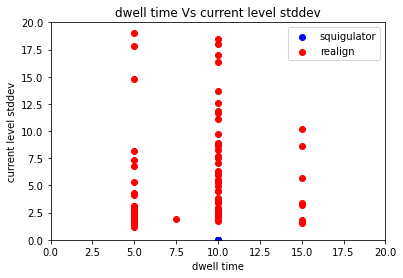

In [31]:
draw_scatter(squigulator, realign, 'squigulator', 'realign')

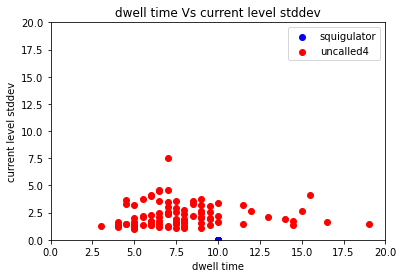

In [8]:
draw_scatter(squigulator, uncalled4, 'squigulator', 'uncalled4')

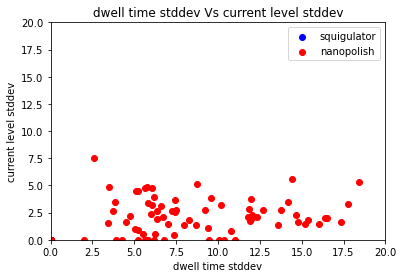

In [32]:
draw_scatter_2(squigulator, nanopolish, 'squigulator', 'nanopolish')

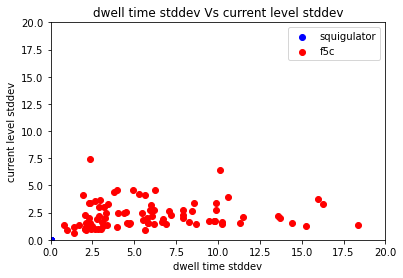

In [33]:
draw_scatter_2(squigulator, f5c, 'squigulator', 'f5c')

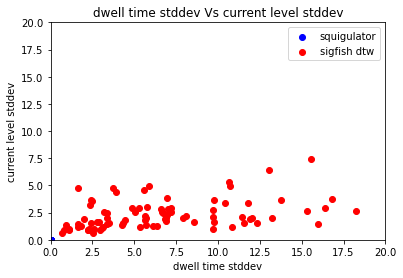

In [34]:
draw_scatter_2(squigulator, sigfish, 'squigulator', 'sigfish dtw')

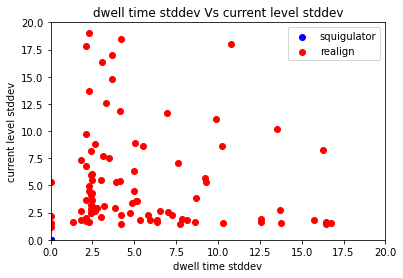

In [35]:
draw_scatter_2(squigulator, realign, 'squigulator', 'realign')

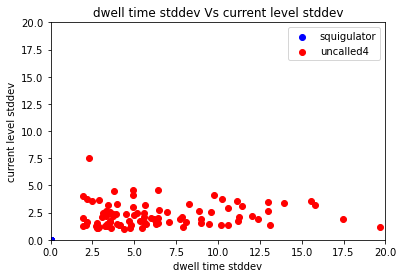

In [9]:
draw_scatter_2(squigulator, uncalled4, 'squigulator', 'uncalled4')